In [3]:
import sqlite3

In [4]:
import pandas as pd

In [5]:
import csv

In [6]:
import os

In [11]:
### downloading files that I am going to work with from kaggle

In [9]:
os.environ['KAGGLE_USERNAME'] = "mariacheremisinova" # username from the json file
os.environ['KAGGLE_KEY'] = "501bad45b10c84cea842c726068b015e" # key from the json file

In [8]:
#pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=9298c3775ea4f2a2b91bf9c65fd220c15fc4f61953979ea60f25324753aaec3c
  Stored in directory: /Users/mariaceremisinova/Library/Caches/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
! kaggle datasets download -d jealousleopard/goodreadsbooks

100%|████████████████████████████████████████| 622k/622k [00:00<00:00, 3.46MB/s]
100%|████████████████████████████████████████| 622k/622k [00:00<00:00, 3.43MB/s]


In [10]:
! kaggle datasets download -d brosen255/goodreads-books

 52%|███████████████████▌                  | 1.00M/1.94M [00:00<00:00, 5.27MB/s]
100%|██████████████████████████████████████| 1.94M/1.94M [00:00<00:00, 8.54MB/s]


In [131]:
! unzip goodreadsbooks.zip
! unzip goodreads-books.zip

Archive:  goodreadsbooks.zip
  inflating: books.csv               
Archive:  goodreads-books.zip
  inflating: good_reads_final.csv    


In [20]:
### creating dataframes, clearing

In [7]:
with open('good_reads_final.csv', 'r') as fd: #initial file contained errors, so I had to clean it first
    file = fd.read()

rows = file.split('\n')
#print(len(rows))
for i, row in enumerate(rows):
    if "']" in row:
        del rows[i]

#print(len(rows))
with open('good_reads_final_cleared.csv', 'w') as fd:
    fd.write('\n'.join(rows))

In [8]:
df = pd.read_csv('good_reads_final_cleared.csv')#dataframe with author info

In [9]:
df.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375.0,277,2000,3230.0
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227.0,465,August 2005,3062.0
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391.0,354,2016,4585.0
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173.0,438,1970,1533.0
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890.0,326,April 15th 1988,2105.0


In [10]:
df.book_id = df.book_id.astype(int)
df.author_average_rating = df.author_average_rating.astype(float)

In [11]:
def clean(text):#clear data from \n
    if type(text) == str:
        text = text.replace("\n", "")
        text = text.strip()
    return text

In [12]:
df["birthplace"] = df["birthplace"].apply(clean)
#df.head()

In [74]:
with open('books.csv', 'r') as fd:#the second file also wasnʼt perfect: I got error in these five rows
    file = fd.read()

rows = file.split('\n')
for i, row in enumerate(rows):
    if set(row.split(',')) & set(["12224", "16914", "22128", "34523", "34889"]):
        del rows[i]

with open('books_cleared.csv', 'w') as fd:
    fd.write('\n'.join(rows))

In [75]:
df2 = pd.read_csv('books_cleared.csv')#dataframe with info about the book and edition

In [76]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [236]:
###syntactic parsing using spacy

In [237]:
import spacy

In [238]:
nlp = spacy.load("en_core_web_sm")

In [240]:
def punct(text): #function to get rid of punctuation
    te = [re.sub('[^\w\s]','', text)]
    return te

In [243]:
titles_list = df2['title'].tolist()
titles_list = ' '.join(titles_list)
titles_list = punct(titles_list)[0]
#titles_list

In [251]:
tagged_titles = []

In [252]:
d = nlp(titles_list) #я не придумала, как в этой работе это использовать, но удалять не стала
for token in d:
    tag = token.text + '_' + token.pos_
    tagged_titles.append(tag)

In [255]:
#tagged_titles

In [21]:
### creating database (with 3 tables: a) about the book; b) about the author; c) about the edition)

In [182]:
con = sqlite3.connect("books.db")
c = con.cursor()

In [183]:
c.execute("DROP TABLE IF EXISTS book_info")
c.execute("CREATE TABLE IF NOT EXISTS book_info(bookID, title, authors, average_rating, isbn13, ratings_count, text_reviews_count)")

In [184]:
for row in df2.itertuples():
    c.execute('INSERT INTO book_info VALUES (?, ?, ?, ?, ?, ?, ?)', (row.bookID, row.title, row.authors, row.average_rating, row.isbn13, row.ratings_count, row.text_reviews_count))

In [185]:
con.commit()

In [186]:
c.execute("DROP TABLE IF EXISTS author_info")
c.execute("CREATE TABLE IF NOT EXISTS author_info(authors, book_id, author_gender, birthplace, author_id, author_page_url, author_average_rating, author_rating_count, genre_1, genre_2, FOREIGN KEY (book_id) REFERENCES book_info(bookID))")

In [187]:
for row in df.itertuples():
    c.execute("INSERT INTO author_info VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (row.author_name, row.book_id, row.author_gender, row.birthplace, row.author_id, row.author_page_url, row.author_average_rating, row.author_rating_count, row.genre_1, row.genre_2))

In [188]:
con.commit()

In [189]:
df3 = df2[["bookID", "language_code", "isbn", "  num_pages", "publication_date", "publisher"]]

In [190]:
c.execute("DROP TABLE IF EXISTS edition_info")
c.execute("CREATE TABLE IF NOT EXISTS edition_info(book_id,language_code,isbn,pages,publication_date,publisher, FOREIGN KEY (book_id) REFERENCES book_info(book_id))")

In [191]:
for row in df3.itertuples():
    c.execute("INSERT INTO edition_info VALUES (?, ?, ?, ?, ?, ?)", (row.bookID, row.language_code, row.isbn, row[4], row.publication_date, row.publisher))

In [192]:
con.commit()

In [193]:
con.close()

In [89]:
### manipulations with database (creating new columns, applying functions, taking subsets etc. )

In [207]:
con = sqlite3.connect("books.db")
c = con.cursor()

In [180]:
author_gender = "female"
average_rating = 4.4
#1. selecting all female writers who have books with rating higher than 4.4

In [209]:
female_writers_query = """
SELECT DISTINCT book_info.authors, title, average_rating
FROM book_info 
    JOIN author_info ON book_info.bookID = author_info.book_id
    JOIN edition_info ON book_info.bookID = edition_info.book_id
WHERE author_gender = ? AND average_rating > ?
ORDER BY average_rating DESC
"""

In [98]:
c.execute(female_writers_query, (author_gender, average_rating))
c.fetchall()

[('J.K. Rowling/Mary GrandPré',
  'Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
  4.57),
 ('J.K. Rowling/Mary GrandPré',
  'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
  4.56),
 ('Jane Austen', 'The Complete Novels', 4.55),
 ('Hiromu Arakawa/Akira Watanabe',
  'Fullmetal Alchemist  Vol. 1 (Fullmetal Alchemist  #1)',
  4.5),
 ('J.K. Rowling/Mary GrandPré',
  'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
  4.49),
 ('Audre Lorde', 'Sister Outsider: Essays and Speeches', 4.49),
 ('Wisława Szymborska/Clare Cavanagh', 'Poems New and Collected', 4.43),
 ('Maya Angelou', 'The Complete Collected Poems', 4.42)]

In [179]:
genre_1 = "Nonfiction"
birthplace = "United States"
pages = 600
#2. selecting all non-fiction books written in US larger than 600 pages (showing author, title, num_pages and rating of the book)

In [99]:
long_USbooks_query = """
SELECT DISTINCT book_info.authors, title, pages, average_rating
FROM book_info 
    JOIN author_info ON book_info.bookID = author_info.book_id
    JOIN edition_info ON book_info.bookID = edition_info.book_id
WHERE genre_1 = ? AND birthplace = ? AND pages > ?
ORDER BY average_rating DESC
"""

In [100]:
c.execute(long_USbooks_query, (genre_1, birthplace, pages))
c.fetchall()

[('David Simon', 'Homicide: A Year on the Killing Streets', 646, 4.38),
 ('Randy Shilts/William Greider',
  'And the Band Played On: Politics  People  and the AIDS Epidemic',
  656,
  4.37),
 ('Norman Mailer', "The Executioner's Song", 1056, 4.06),
 ('Jared Diamond',
  'Collapse: How Societies Choose to Fail or Succeed',
  608,
  3.93),
 ('Thomas L. Friedman',
  'The World Is Flat: A Brief History of the Twenty-first Century',
  616,
  3.68)]

In [195]:
#3. deleting the worst books ever
c.execute("SELECT COUNT(title) FROM book_info WHERE average_rating < 1")
c.fetchall()

[(25,)]

In [105]:
c.execute("DELETE FROM book_info WHERE average_rating < 1")
con.commit()

In [107]:
#c.execute("SELECT COUNT(title) FROM book_info WHERE average_rating < 1")
#c.fetchall()

[(0,)]

In [224]:
#4. combining columns genre_1 and genre_2 into one column
c.execute("SELECT genre_1 || ', ' || genre_2 AS genres FROM author_info")
c.fetchall()

[('Mystery, Historical',),
 ('Fiction, Mystery',),
 ('Romance, Contemporary',),
 ('Fiction, Magical Realism',),
 ('Fantasy, Young Adult',),
 ('Sequential Art, Sequential Art',),
 ('Young Adult, Romance',),
 ('Nonfiction, Science',),
 ('Paranormal, Horror',),
 ('Young Adult, Romance',),
 ('Fantasy, Young Adult',),
 ('Fantasy, Fantasy',),
 ('Romance, Romance',),
 ('Young Adult, Science Fiction',),
 ('Fiction, Classics',),
 ('Romance, Fantasy',),
 ('Romance, Academic',),
 ('Romance, Sports and Games',),
 ('Romance, War',),
 ('Romance, Contemporary',),
 ('Fantasy, Romance',),
 ('Romance, Contemporary',),
 ('Romance, Sociology',),
 ('Romance, Contemporary',),
 ('Romance, Contemporary',),
 ('Romance, Romance',),
 ('Romance, Contemporary',),
 ('Romance, New Adult',),
 ('Romance, War',),
 ('Romance, Romance',),
 ('Fantasy, Romance',),
 ('Romance, Contemporary',),
 ('Romance, Contemporary',),
 ('Romance, Fantasy',),
 ('Romance, Historical',),
 ('Romance, Contemporary',),
 ('Romance, Young Adult

In [225]:
con.commit()

In [226]:
con.close()

In [108]:
### graphs & plots

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/mariaceremisinova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


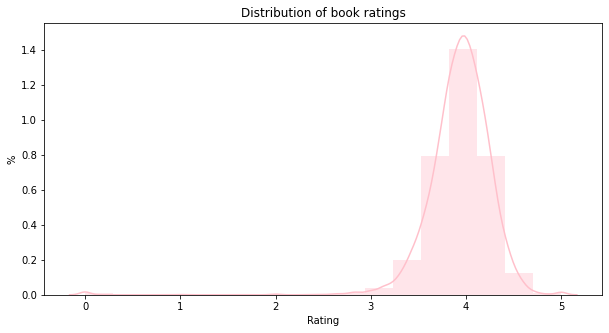

In [189]:
plt.figure(figsize=(10, 5)) #1. histogram of book ratings. we can see that the average rating is 4. And most reviews range from 3 to 5 approximately.
sns.distplot(df2['average_rating'], bins=17, color='pink')
plt.title('Distribution of book ratings')
plt.ylabel('%')
plt.xlabel('Rating');

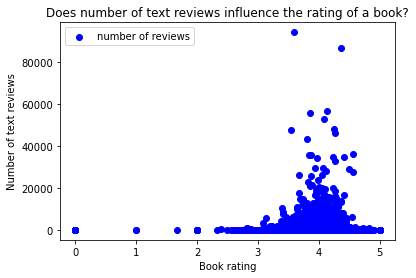

In [190]:
#2. I also wanted to create a scatter plot in order to see whether the number of reviews has any influence on the rating itself.
#It often seems that popular books tend to have lower ratings (since itʼs impossible for everyone to love a book).
#The plot shows that indeed for most popular books (most reviewed) range from 3.5 to 4.5.
#Books with rating lower than 3.5 and higher than 4.5 have less reviews.
#Naturally, the overall distribution resembles the previous plot.
plt.scatter(df2["average_rating"], df2["text_reviews_count"], color='blue', label='number of reviews') # num of reviews

plt.title('Does number of text reviews influence the rating of a book?')
plt.ylabel('Number of text reviews')
plt.xlabel('Book rating')
plt.legend(loc='best')
plt.show()

In [196]:
#3. other data that would be interesting to look at: what are the most popular genres that people write in?
#and whether this distribution is different for male and female writers

In [312]:
df_m = df[df['author_gender'] == "male"]
df_f = df[df['author_gender'] == "female"]

In [280]:
#There are too many genres to try to display all.
#plt.figure(figsize=(10, 5))
#df_m['genre_1'].value_counts().plot(kind='pie');
#plt.title('Genres');

In [330]:
df_m2 = df_m['genre_1'].value_counts()
df_m2 = df_m2.sort_values(ascending = False)
m = df_m2[:9]
#df_m2[5:].sum()

In [331]:
other_m = pd.Series([df_m2[9:].sum()], index=["Other"])#creating a separate part of pie for other genres

In [332]:
m = pd.concat([m, other_m])
#m

Text(0, 0.5, '')

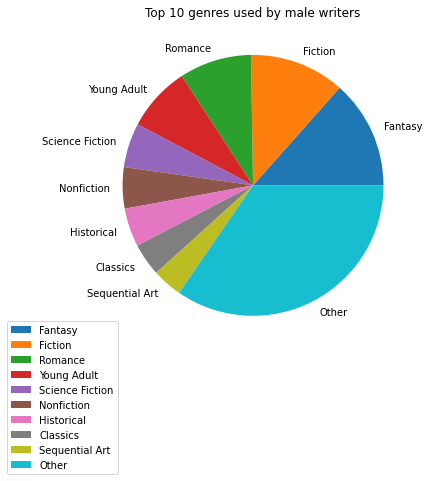

In [334]:
plt.figure(figsize=(12, 6))#genres in which men mostly write
m.plot(kind='pie');
plt.title('Top 10 genres used by male writers');
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
plt.ylabel('')

In [335]:
df_f2 = df_f['genre_1'].value_counts()
df_f2 = df_f2.sort_values(ascending = False)
f = df_f2[:9]
#df_f2[5:].sum()

In [336]:
other_f = pd.Series([df_f2[9:].sum()], index=["Other"])#creating a separate part of pie for other genres

In [337]:
f = pd.concat([f, other_f])
#f

Text(0, 0.5, '')

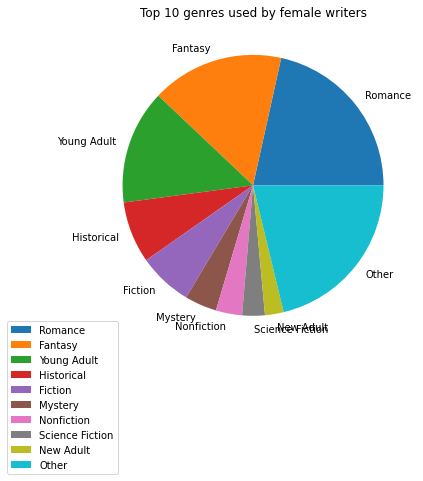

In [339]:
plt.figure(figsize=(12, 6))#genres in which women mostly write
f.plot(kind='pie');
plt.title('Top 10 genres used by female writers');
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
plt.ylabel('')
#As we can see, the genres for men and women are different. The top 3 genres that men write in are: 1) fantasy,
#2) fiction, 3) romance, while for women they are: 1) romance, 2) fantasy, 3) young adult.
#Nonfiction and science fiction are written by men and women approximately equally.
#Also, this simple representation shows that classics are written mostly by men
#(female writers are more rarely considered to be classic writers).

In [227]:
##morphological parising with nltk

In [228]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariaceremisinova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mariaceremisinova/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [229]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaceremisinova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [230]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/mariaceremisinova/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [233]:
from nltk.corpus import stopwords

In [234]:
import re

In [231]:
sw = nltk.corpus.stopwords.words('english')

In [232]:
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w in sw]
    tagged = nltk.pos_tag(tokens, tagset='universal')
    return tagged

In [176]:
##counting POS used in book titles. Probably the most frequent POS in titles is noun.
## Are adjectives used more often than verbs? Are adverbs used at all?

In [171]:
titles_tagged = pos_tagging(titles_list)#this list was created earlier (also used for spacy tagging)
#titles_tagged[:10]

In [172]:
tag_fd = nltk.FreqDist(tag for (word, tag) in titles_tagged)
df_pos = tag_fd.most_common()
type(df_pos)

list

In [173]:
poss = pd.DataFrame(df_pos, columns =['POS', 'total'])
poss[:10]

,POS,total
0,NOUN,42916
1,DET,4587
2,NUM,3577
3,VERB,1382
4,ADP,834
5,ADJ,748
6,PRON,710
7,X,251
8,ADV,247
9,PRT,79


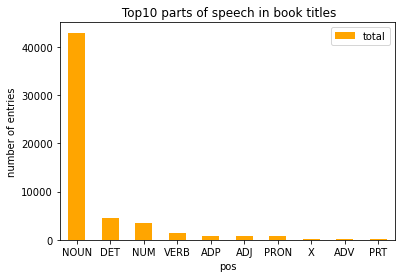

In [174]:
#4. bar plot about POS in titles
poss[:10].plot.bar(x='POS', rot=0, color='orange');
plt.title(' Top10 parts of speech in book titles')
plt.xlabel('pos')
plt.ylabel('number of entries');

In [178]:
#Indeed, nouns are the most frequent POS in book titles.
# Next, we have Determiners and numerals. Interestingly, verbs are more frequent than adjectives.
#Adverbs are infrequent but present in the sample.

In [258]:
###Final project thoughts
###Со своими полевыми данными у меня ничего не придумывается (там и парсинг не нужен, да и нет таких данных, чтобы можно было гипотезы проверять статистически или еще как-то).
### Я пока подумала, что, наверное, выберу опцию 2.
### И, наверное, хочу про interactive plots. (или clustering)